In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Final_Preprocessed_Data.csv')
data.head()

,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Others,0.0,0.0,10+,10.0,15,0.0,10.0,7.1,2020-02-26,2020-02-26,Everyone,False,False,False
1,Tools,4.4,64.0,"5,000+",5000.0,7662,0.0,2.9,5.0,2020-05-21,2021-05-06,Everyone,True,False,False
2,Productivity,0.0,0.0,50+,50.0,58,0.0,3.7,4.0,2019-08-09,2019-08-19,Everyone,False,False,False
3,Others,5.0,5.0,10+,10.0,19,0.0,1.8,4.0,2018-09-10,2018-10-13,Everyone,True,False,False
4,Tools,0.0,0.0,100+,100.0,478,0.0,6.2,4.1,2020-02-21,2018-11-12,Everyone,False,False,False


In [5]:
data.shape

(2312944, 15)

In [6]:
data.columns

Index(['Category', 'Rating', 'Rating Count', 'Installs', 'Minimum Installs',
       'Maximum Installs', 'Price', 'Size', 'Minimum Android', 'Released',
       'Last Updated', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice'],
      dtype='object')

In [7]:
num_cols=['Rating', 'Rating Count', 'Maximum Installs', 'Price', 'Size']
cat_cols=['Category', 'Installs', 'Minimum Installs', 'Minimum Android', 'Content Rating', 
          'Ad Supported', 'In App Purchases', 'Editors Choice']

# Descriptive Statistics

In [15]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,2312944.0,2.191911,2.105774e+00,0.000000,0.0,2.9,4.3,5.000000e+00
Rating Count,2312944.0,2838.158815,2.111120e+05,0.000000,0.0,6.0,41.0,1.385576e+08
Maximum Installs,2312944.0,320201.713137,2.355495e+07,0.000000,84.0,695.0,7354.0,1.205763e+10
Price,2312944.0,0.103499,2.633127e+00,0.000000,0.0,0.0,0.0,4.000000e+02
Size,2312944.0,19.121644,2.373932e+01,0.003125,5.0,10.0,25.0,1.500000e+03


**Inference**: 
1. Almost 25% of the data has ratings greater than 4.3, and 50% to be greater than 2.9
2. Almost 50% of the apps have no or less than 7 rating counts.
3. Installations has a trend. Almost 75% of the apps are a failure. Only 25% of the apps get over 7000+installs which shows the competitiveness of the app market.
4. Almost all the apps are free and very small amount of apps are paid ones.
5. 75% of apps are less than 25 MB.

In [22]:
data[cat_cols].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Category,2312944,31,Others,808247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,2312944,22,100+,443369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Minimum Installs,2312944.0,NaN,NaN,NaN,183438.104674,15131089.119219,0.0,50.0,500.0,5000.0,10000000000.0
Minimum Android,2312944.0,NaN,NaN,NaN,4.346819,0.852929,1.0,4.1,4.2,5.0,8.0
Content Rating,2312944,4,Everyone,2055990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ad Supported,2312944,2,False,1162170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
In App Purchases,2312944,2,False,2117635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Editors Choice,2312944,2,False,2312091,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Inference**


In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,2312944.0,2.191911,2.105774e+00,0.000000,0.0,2.9,4.3,5.000000e+00
Rating Count,2312944.0,2838.158815,2.111120e+05,0.000000,0.0,6.0,41.0,1.385576e+08
Minimum Installs,2312944.0,183438.104674,1.513109e+07,0.000000,50.0,500.0,5000.0,1.000000e+10
Maximum Installs,2312944.0,320201.713137,2.355495e+07,0.000000,84.0,695.0,7354.0,1.205763e+10
Price,2312944.0,0.103499,2.633127e+00,0.000000,0.0,0.0,0.0,4.000000e+02
Size,2312944.0,19.121644,2.373932e+01,0.003125,5.0,10.0,25.0,1.500000e+03
Minimum Android,2312944.0,4.346819,8.529294e-01,1.000000,4.1,4.2,5.0,8.000000e+00


# Structure of EDA

1. **Univariate Analysis**: Histograms, Box plots, Frequency tables, Summary statistics (mean, median, mode, range, variance, standard deviation)
2. **Bivariate Analysis**: Scatter plots, Correlation matrix/heatmap, Box plots, Bar plots, Line plots, ANOVA, Chi-square test for categorical variables
3. **Multivariate Analysis**: Pair plots, Multivariate scatter plots, Heatmaps, Principal Component Analysis (PCA), Multivariate regression
4. **Time Series Analysis**: Line plots, Time series decomposition, Autocorrelation plots (ACF), Seasonal decomposition of time series (STL)
5. 


### 1. Univariate Analysis

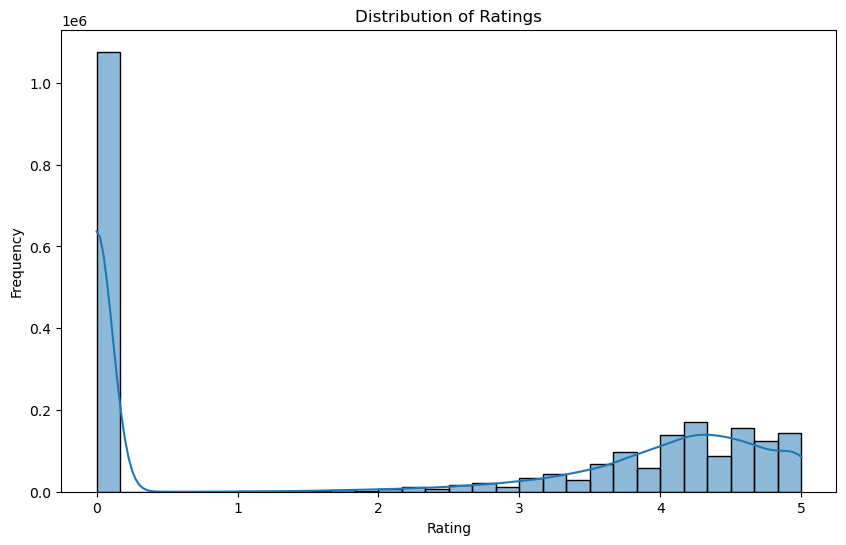

In [34]:
# Plot histogram for Rating
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


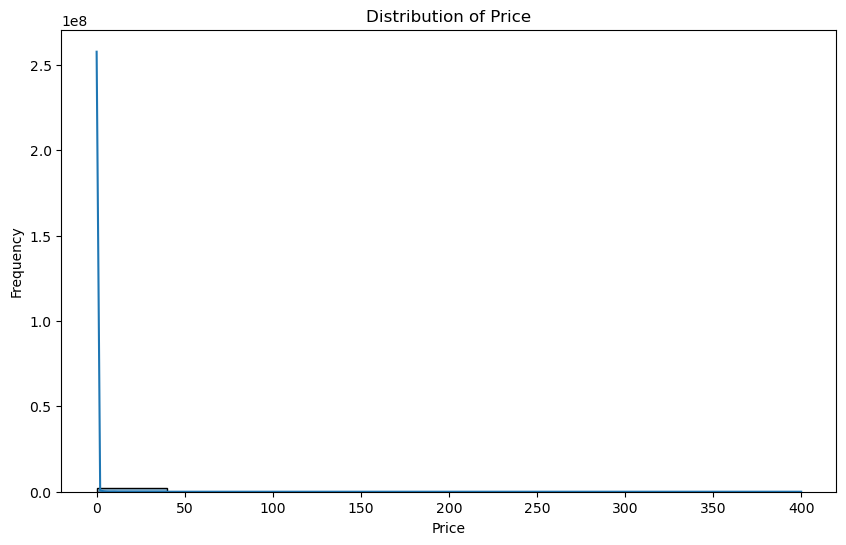

In [39]:
# Plot histogram for Price
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=10, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


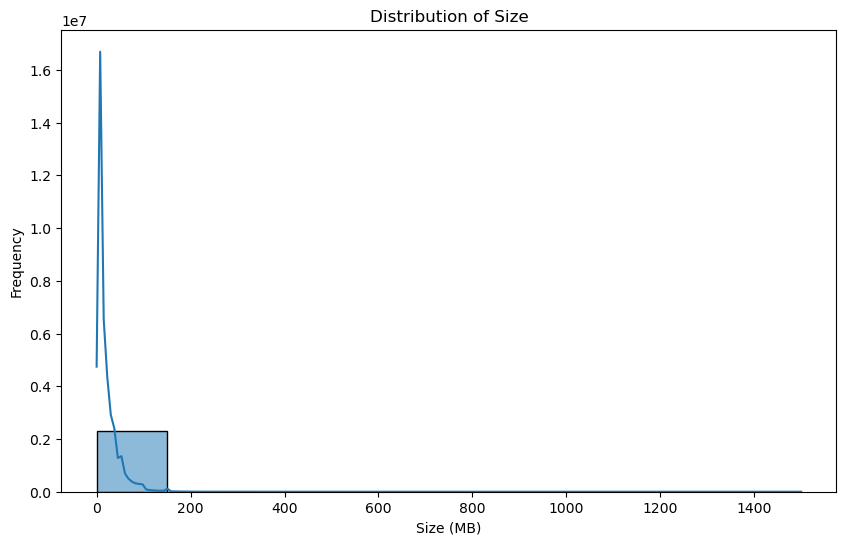

In [40]:
# Plot histogram for Size
plt.figure(figsize=(10, 6))
sns.histplot(data['Size'], bins=10, kde=True)
plt.title('Distribution of Size')
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.show()

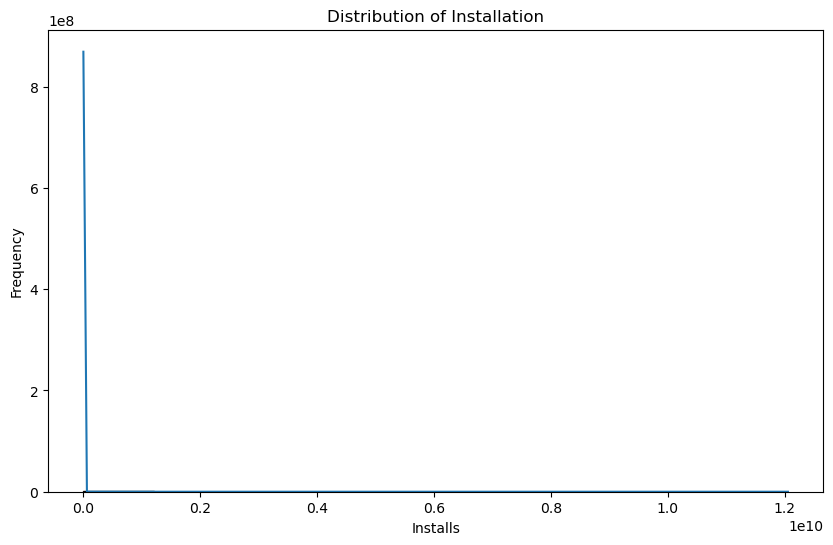

In [41]:
# Plot histogram for Maximum Installs
plt.figure(figsize=(10, 6))
sns.histplot(data['Maximum Installs'], bins=10, kde=True)
plt.title('Distribution of Installation')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.show()

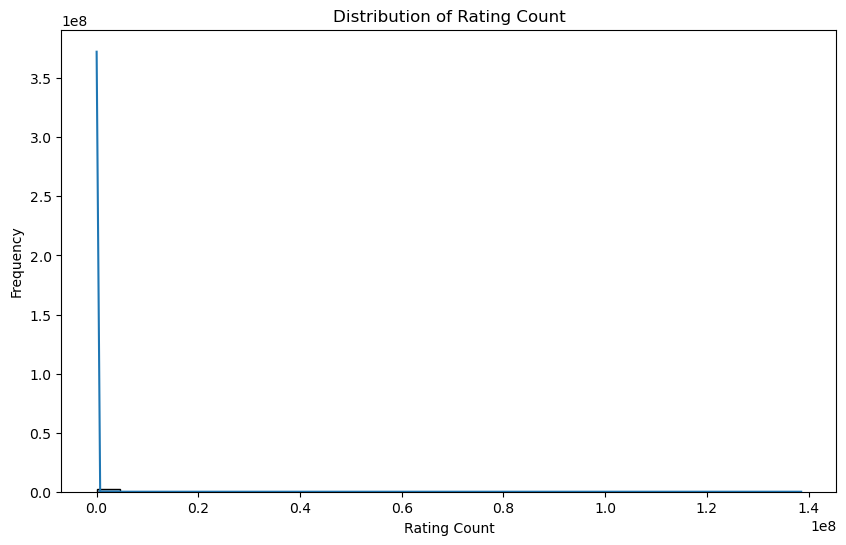

In [38]:
# Plot histogram for Rating Count
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating Count'], bins=30, kde=True)
plt.title('Distribution of Rating Count')
plt.xlabel('Rating Count')
plt.ylabel('Frequency')
plt.show()

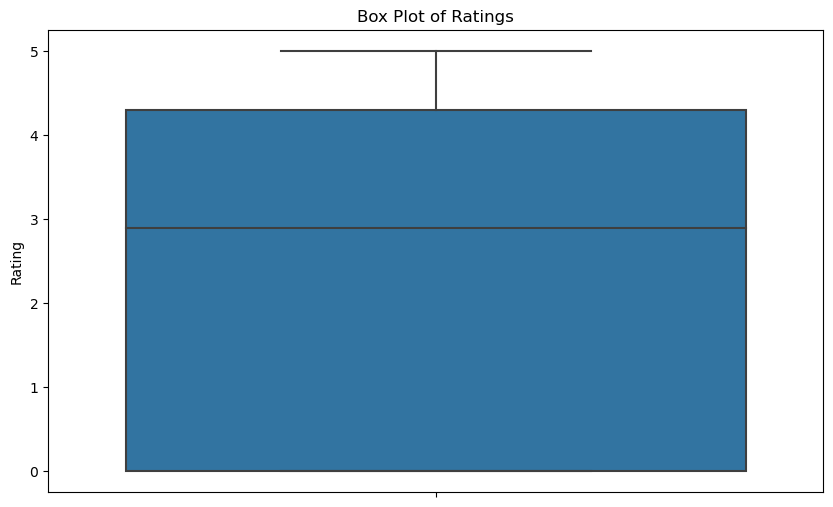

In [42]:
# Plot box plot for Rating
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Rating'])
plt.title('Box Plot of Ratings')
plt.ylabel('Rating')
plt.show()

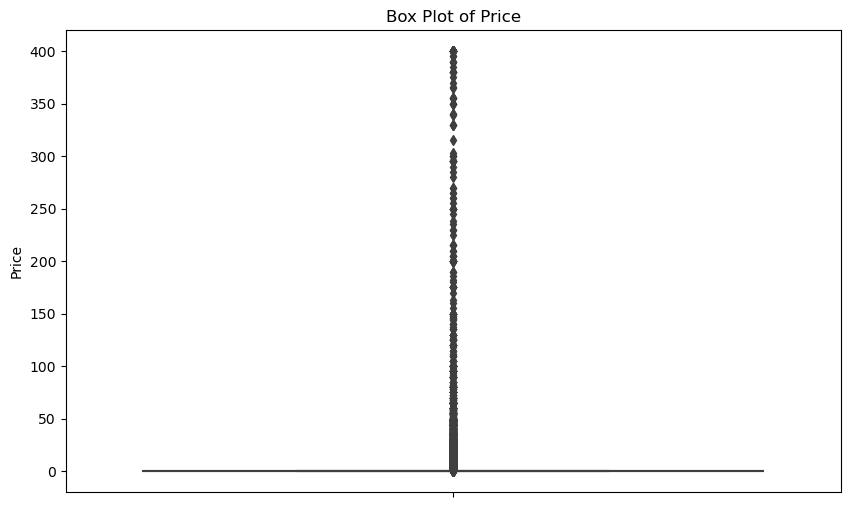

In [43]:
# Plot box plot for Price
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Price'])
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

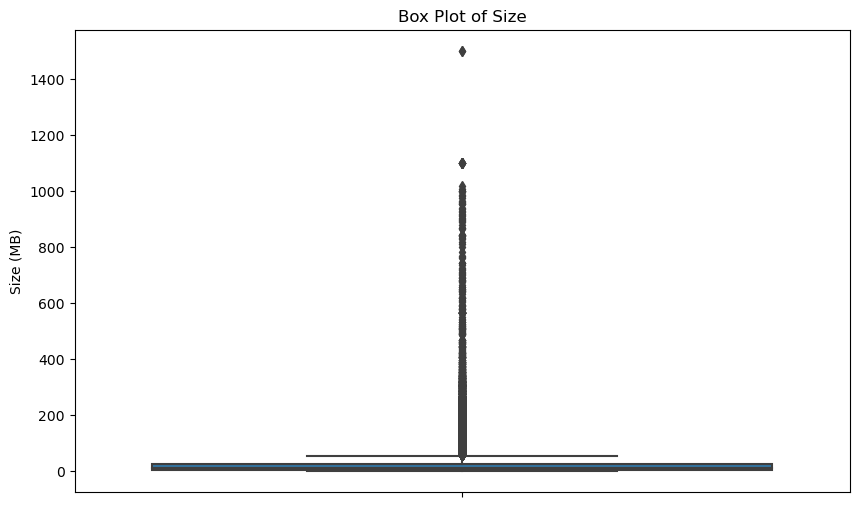

In [44]:
# Plot box plot for Size
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Size'])
plt.title('Box Plot of Size')
plt.ylabel('Size (MB)')
plt.show()

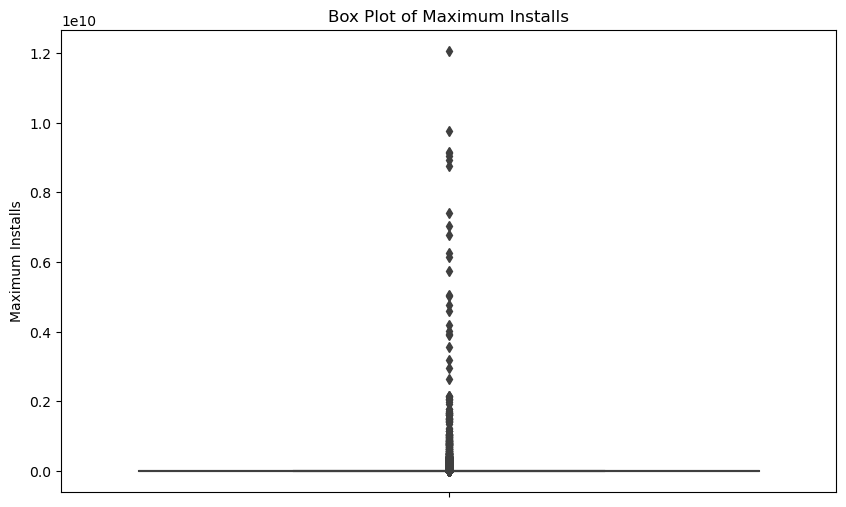

In [45]:
# Plot Boxplot for Maximum Installs
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Maximum Installs'])
plt.title('Box Plot of Maximum Installs')
plt.ylabel('Maximum Installs')
plt.show()


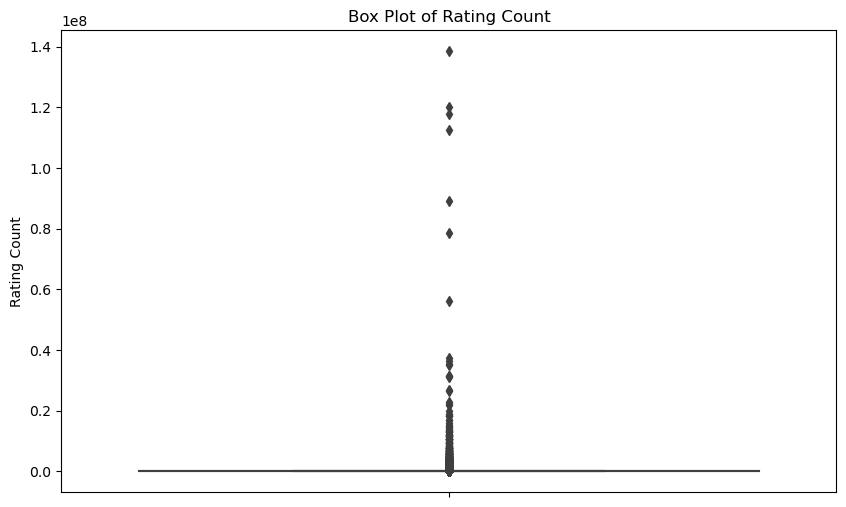

In [46]:
# Plot box plot for Rating Count
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Rating Count'])
plt.title('Box Plot of Rating Count')
plt.ylabel('Rating Count')
plt.show()

Category
Others                     808247
Music                      159108
Tools                      143988
Entertainment              138276
Lifestyle                  118331
Personalization             89210
Health & Fitness            83510
Productivity                79698
Shopping                    75256
Food & Drink                73927
Travel & Local              67288
Finance                     65466
Puzzle                      51168
Sports                      47483
Social                      44734
News & Magazines            42807
Photography                 35552
Medical                     32065
Maps & Navigation           26722
Simulation                  23282
House & Home                14369
Video Players & Editors     14015
Events                      12841
Trivia                      11795
Racing                      10362
Role Playing                10034
Word                         8630
Strategy                     8526
Weather                      7246
Libra

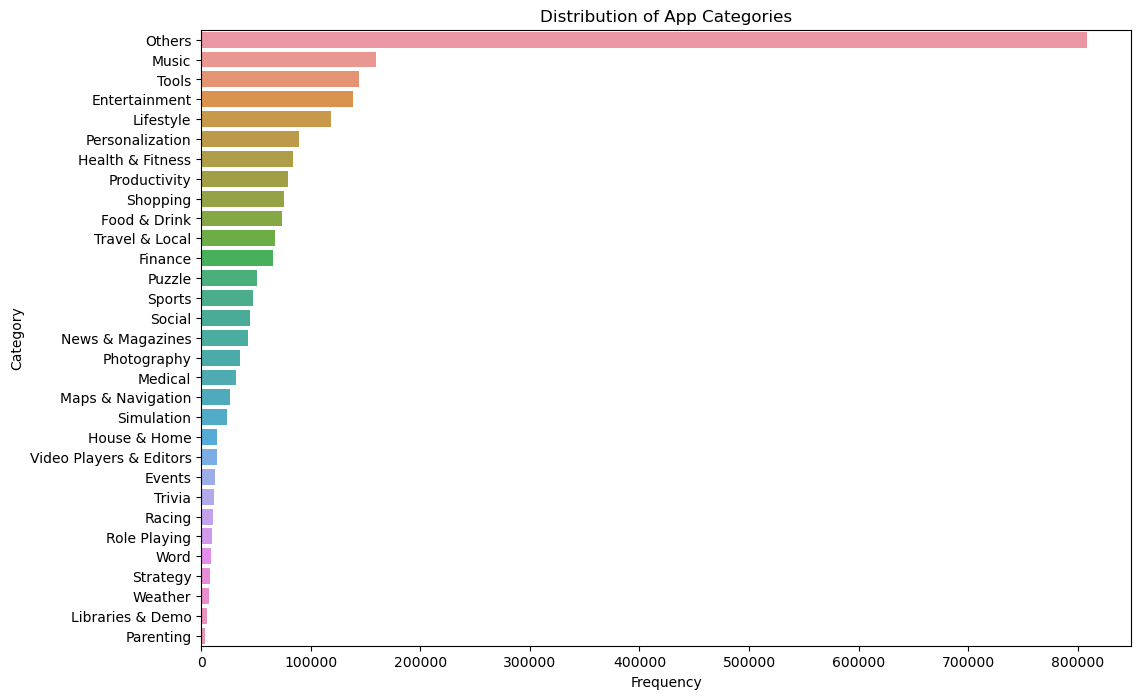

In [20]:
# Frequency table for Category
category_counts = data['Category'].value_counts()
print(category_counts)


# Bar plot for Category
plt.figure(figsize=(12, 8))
sns.countplot(y=data['Category'], order=category_counts.index)
plt.title('Distribution of App Categories')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()

Content Rating
Everyone      2055990
Teen           196375
Mature 17+      60425
Unrated           154
Name: count, dtype: int64


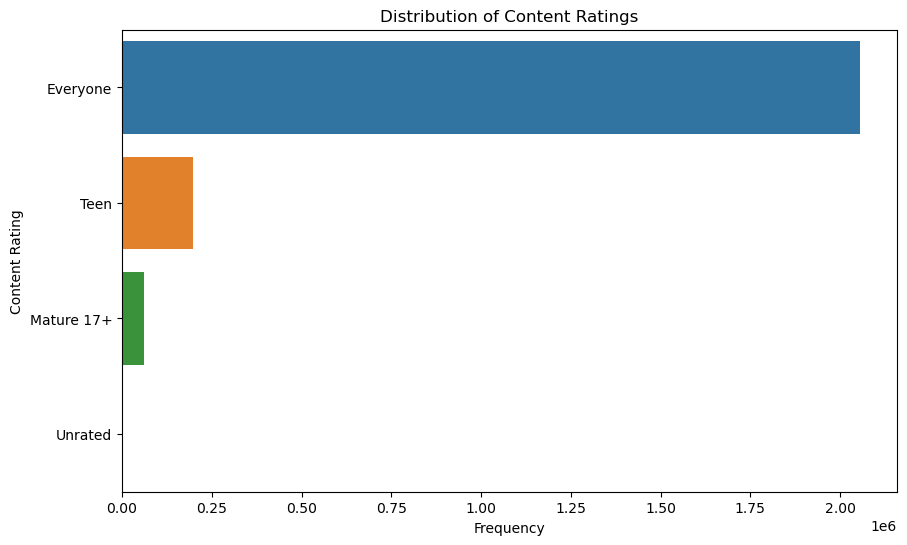

In [21]:
# Frequency table for Content Rating
content_rating_counts = data['Content Rating'].value_counts()
print(content_rating_counts)

# Bar plot for Content Rating
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Content Rating'], order=content_rating_counts.index)
plt.title('Distribution of Content Ratings')
plt.xlabel('Frequency')
plt.ylabel('Content Rating')
plt.show()


# Bivariate Analysis

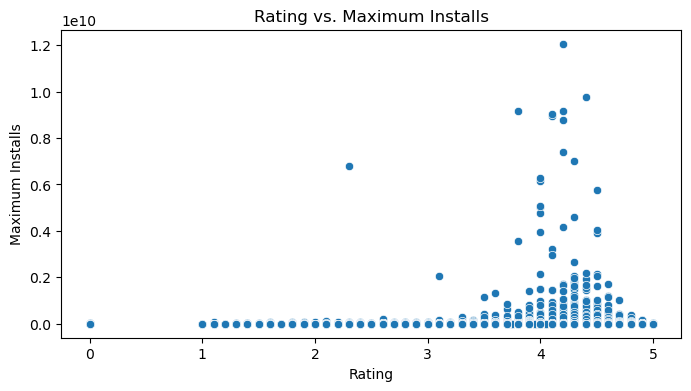

In [50]:
# Scatter plot for Rating vs. Maximum Installs
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Rating', y='Maximum Installs', data=data)
plt.title('Rating vs. Maximum Installs')
plt.xlabel('Rating')
plt.ylabel('Maximum Installs')
plt.show()

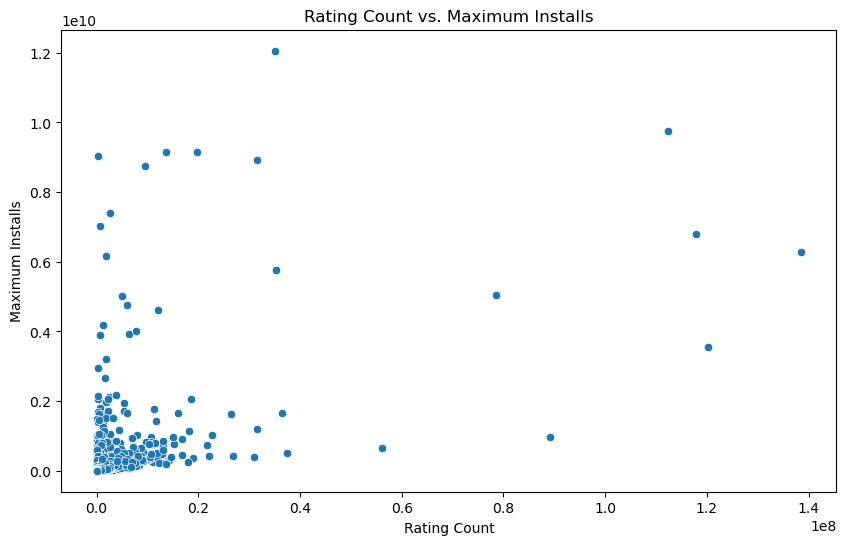

In [48]:
# Scatter plot for Rating Count vs. Maximum Installs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating Count', y='Maximum Installs', data=data)
plt.title('Rating Count vs. Maximum Installs')
plt.xlabel('Rating Count')
plt.ylabel('Maximum Installs')
plt.show()

                    Rating  Rating Count  Maximum Installs     Price      Size
Rating            1.000000      0.013055          0.012641 -0.003476  0.054031
Rating Count      0.013055      1.000000          0.547578 -0.000406  0.016289
Maximum Installs  0.012641      0.547578          1.000000 -0.000515  0.007607
Price            -0.003476     -0.000406         -0.000515  1.000000  0.004500
Size              0.054031      0.016289          0.007607  0.004500  1.000000


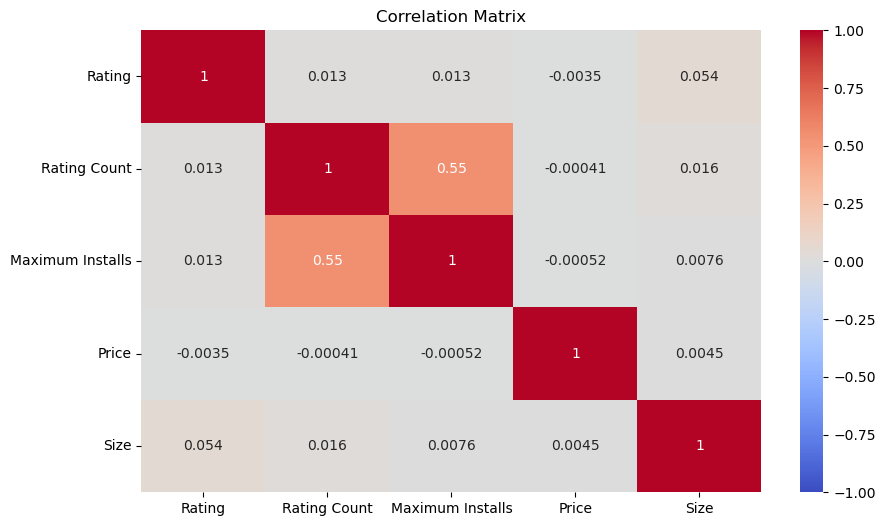

In [24]:
# Correlation matrix
corr_matrix = data[['Rating', 'Rating Count', 'Maximum Installs', 'Price', 'Size']].corr()
print(corr_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

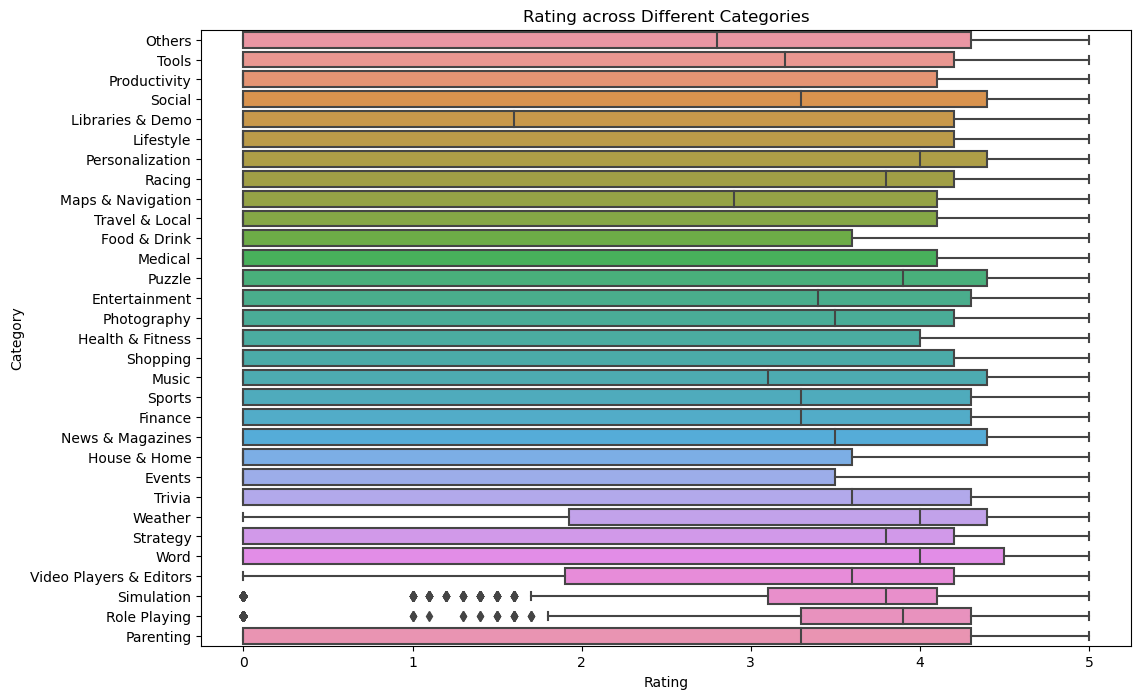

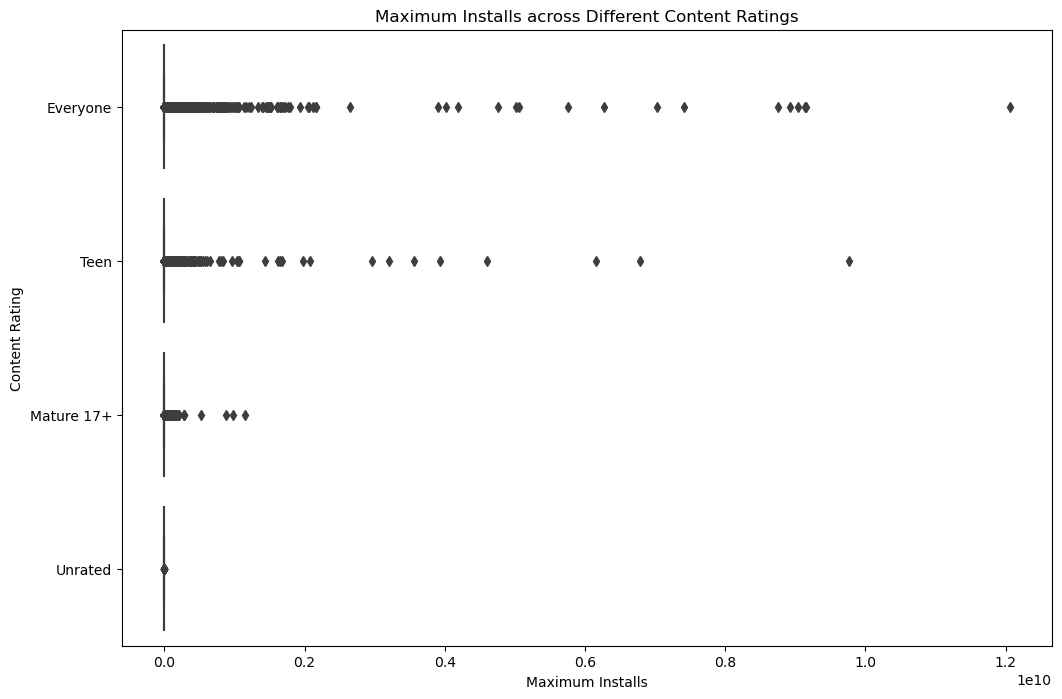

In [25]:
# Box plot for Rating across different Categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='Rating', y='Category', data=data)
plt.title('Rating across Different Categories')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.show()

# Box plot for Maximum Installs across different Content Ratings
plt.figure(figsize=(12, 8))
sns.boxplot(x='Maximum Installs', y='Content Rating', data=data)
plt.title('Maximum Installs across Different Content Ratings')
plt.xlabel('Maximum Installs')
plt.ylabel('Content Rating')
plt.show()

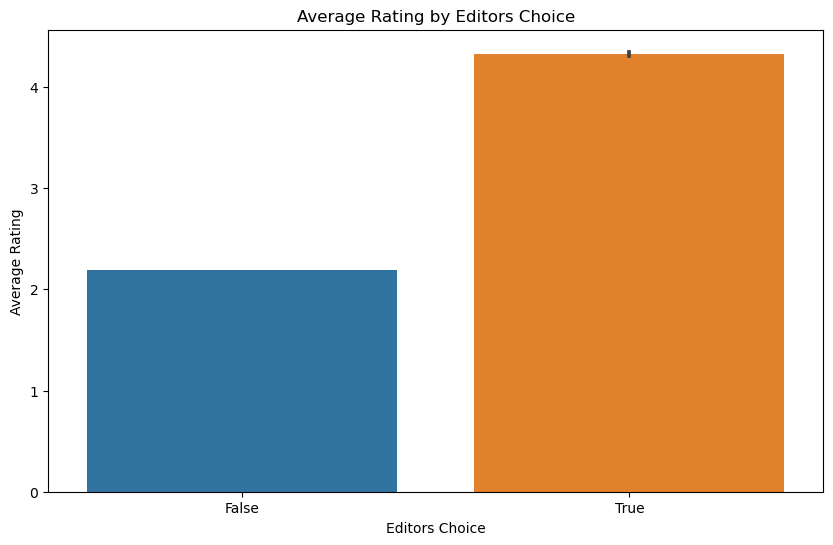

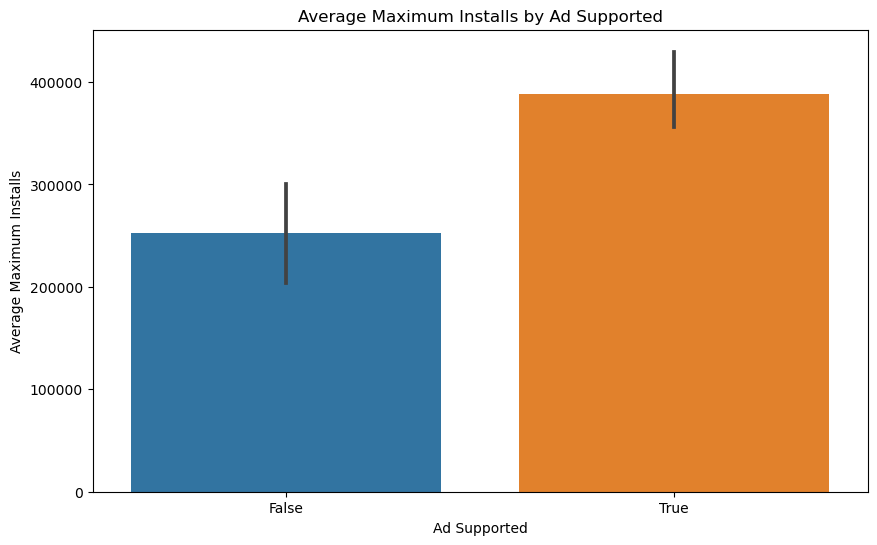

In [26]:
# Bar plot for Average Rating by Editors Choice
plt.figure(figsize=(10, 6))
sns.barplot(x='Editors Choice', y='Rating', data=data)
plt.title('Average Rating by Editors Choice')
plt.xlabel('Editors Choice')
plt.ylabel('Average Rating')
plt.show()

# Bar plot for Average Maximum Installs by Ad Supported
plt.figure(figsize=(10, 6))
sns.barplot(x='Ad Supported', y='Maximum Installs', data=data)
plt.title('Average Maximum Installs by Ad Supported')
plt.xlabel('Ad Supported')
plt.ylabel('Average Maximum Installs')
plt.show()


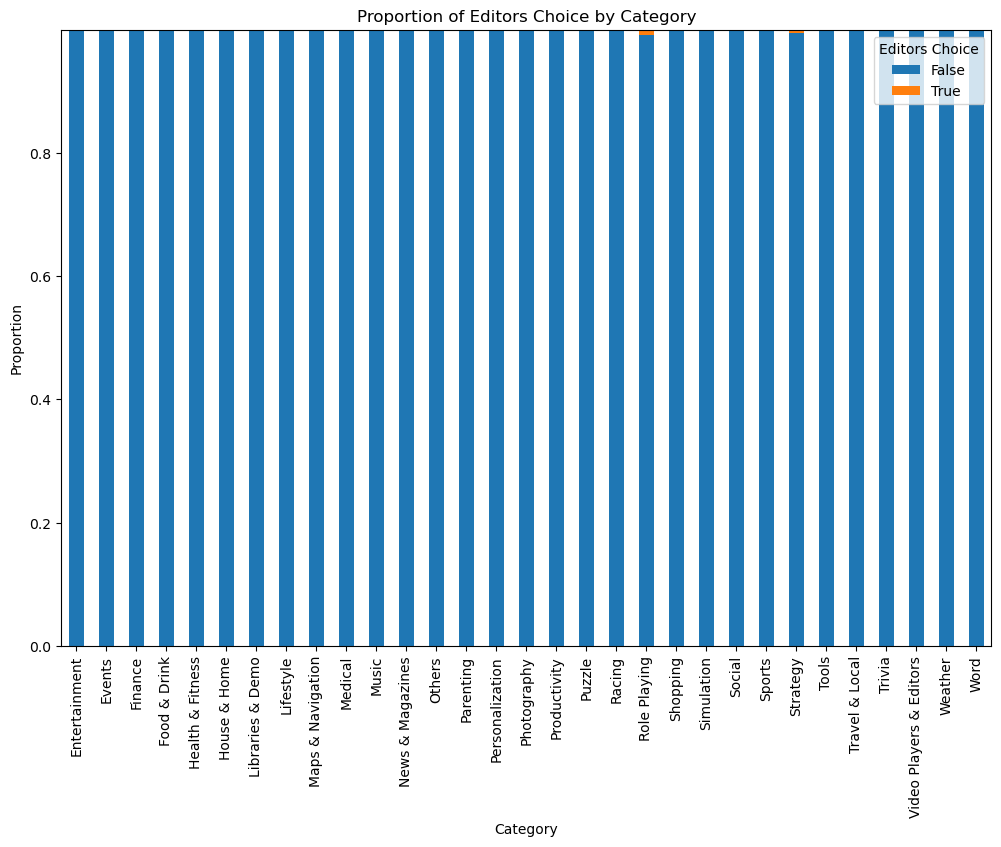

In [27]:
# Stacked bar plot for Category and Editors Choice
category_editors_choice = pd.crosstab(data['Category'], data['Editors Choice'])
category_editors_choice.div(category_editors_choice.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Proportion of Editors Choice by Category')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.show()


In [30]:
# Convert datetime columns
data['Released'] = pd.to_datetime(data['Released'])
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

In [31]:
# Extract year, month, and day
data['Released Year'] = data['Released'].dt.year
data['Released Month'] = data['Released'].dt.month
data['Released Day'] = data['Released'].dt.day

data['Last Updated Year'] = data['Last Updated'].dt.year
data['Last Updated Month'] = data['Last Updated'].dt.month
data['Last Updated Day'] = data['Last Updated'].dt.day


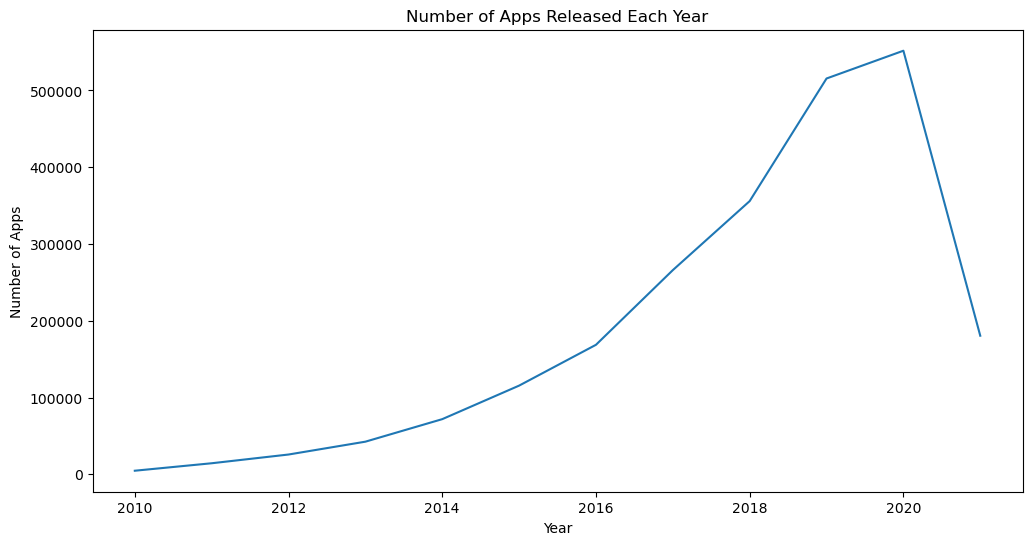

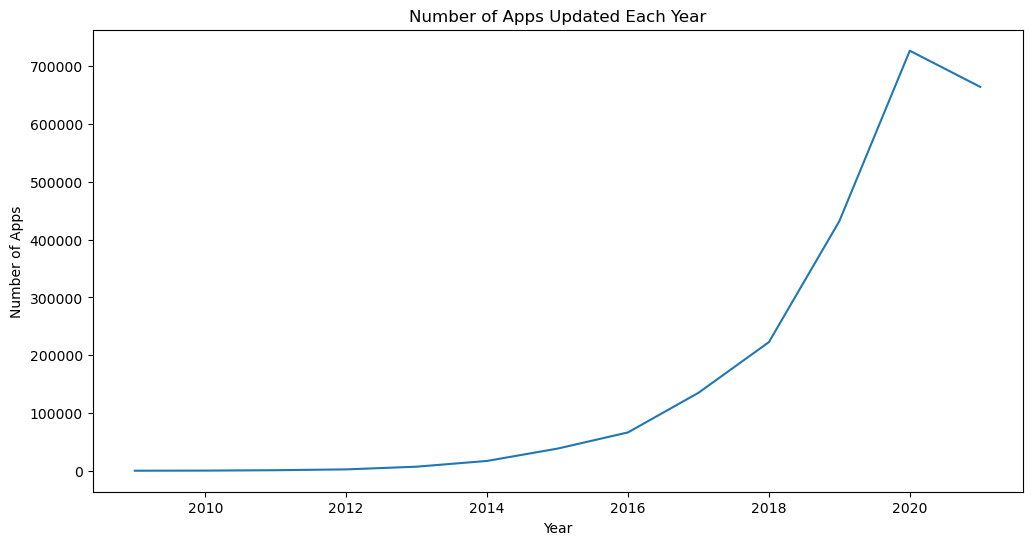

In [32]:
# Plot the number of apps released each year
plt.figure(figsize=(12, 6))
data['Released Year'].value_counts().sort_index().plot()
plt.title('Number of Apps Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.show()

# Plot the number of apps updated each year
plt.figure(figsize=(12, 6))
data['Last Updated Year'].value_counts().sort_index().plot()
plt.title('Number of Apps Updated Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.show()


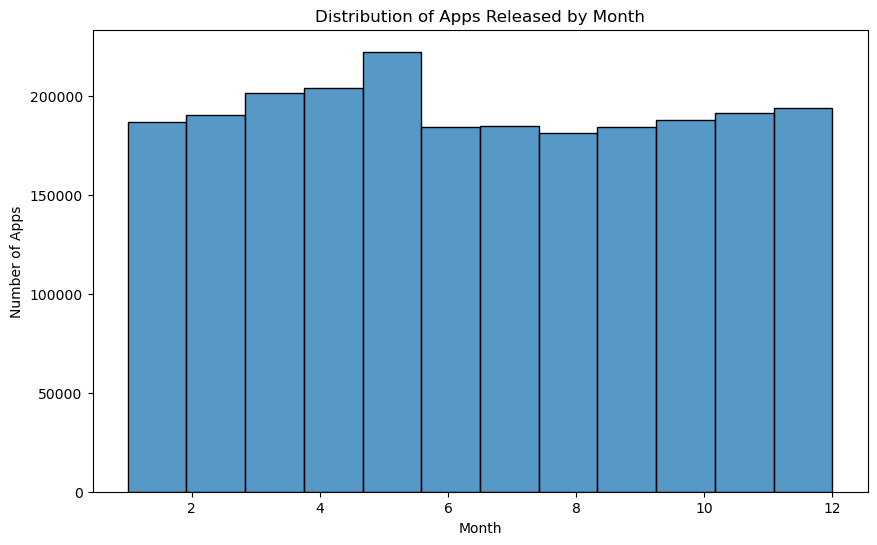

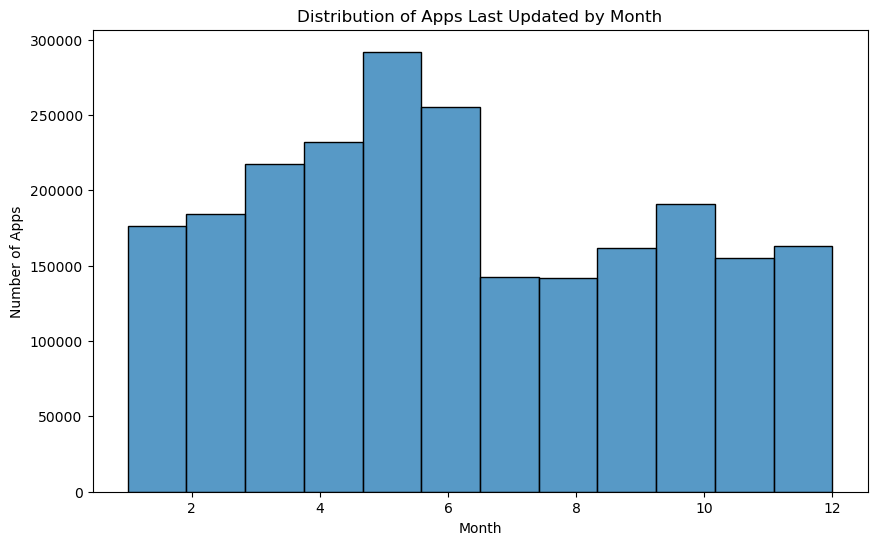

In [33]:
# Histogram of apps released by month
plt.figure(figsize=(10, 6))
sns.histplot(data['Released Month'], bins=12, kde=False)
plt.title('Distribution of Apps Released by Month')
plt.xlabel('Month')
plt.ylabel('Number of Apps')
plt.show()

# Histogram of apps last updated by month
plt.figure(figsize=(10, 6))
sns.histplot(data['Last Updated Month'], bins=12, kde=False)
plt.title('Distribution of Apps Last Updated by Month')
plt.xlabel('Month')
plt.ylabel('Number of Apps')
plt.show()
